In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score,f1_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('diabetes (2).csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Check for missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
#check for duplicate values
df.duplicated().sum()

np.int64(0)

In [ ]:
#descriptive statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_features.remove('Outcome')

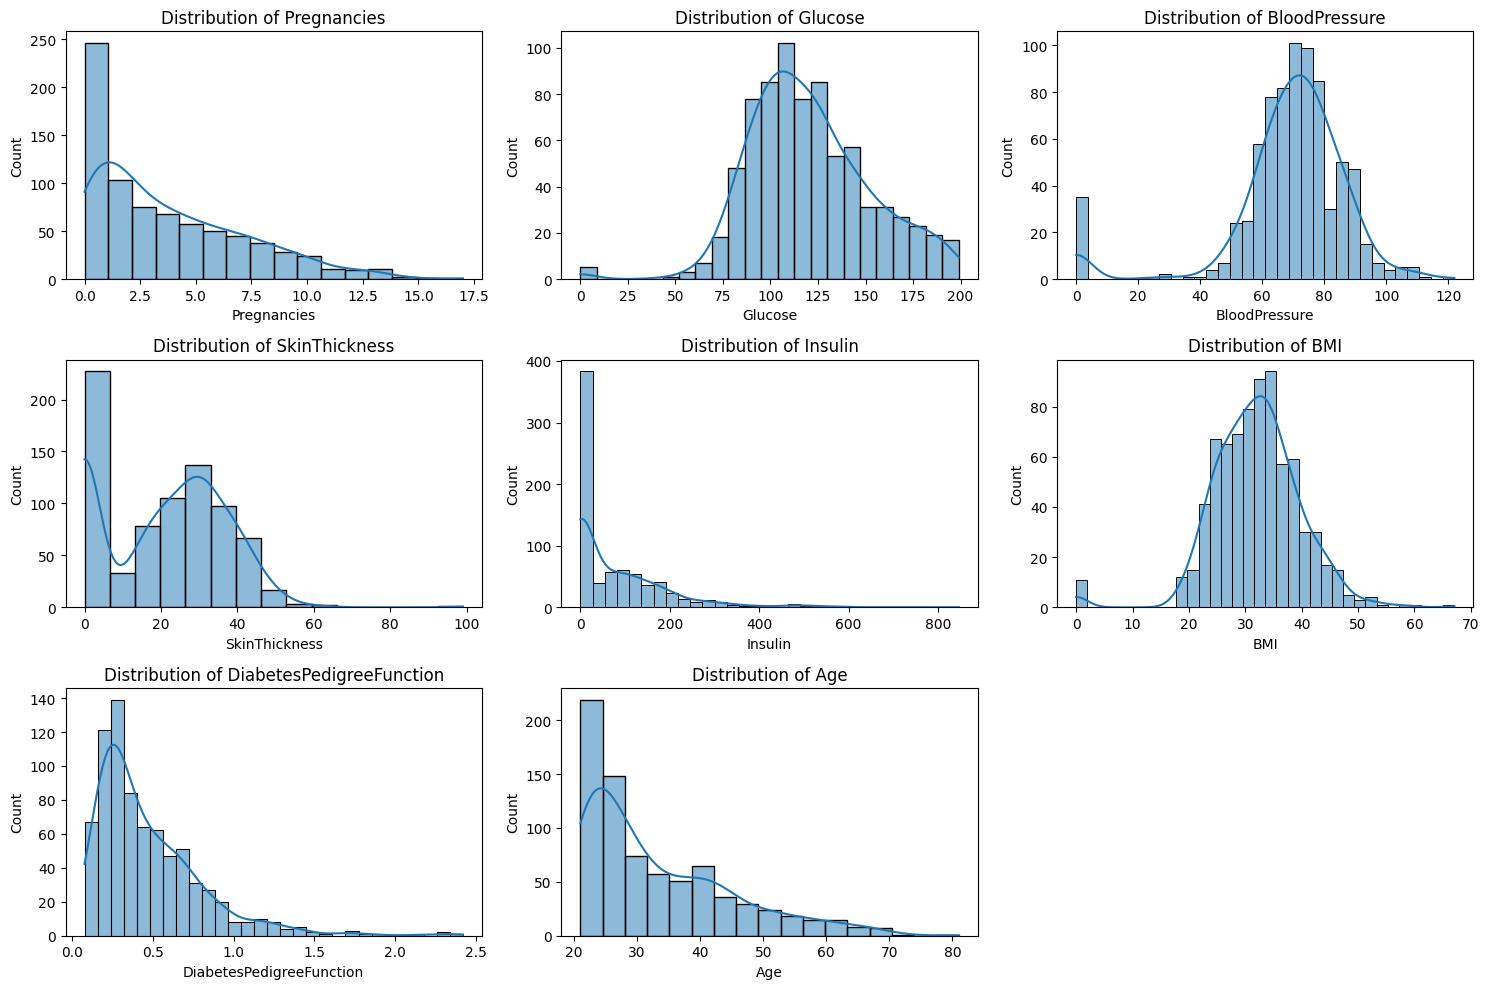

In [ ]:
#Histograms
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

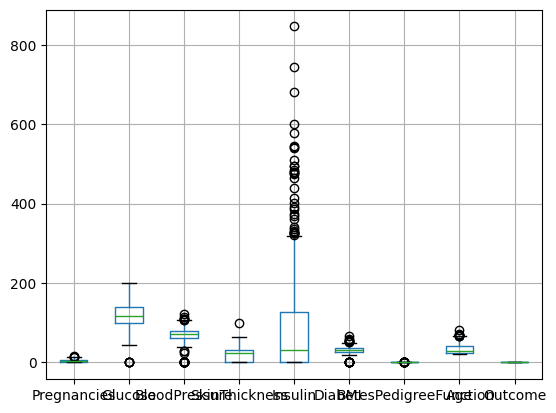

In [17]:
##Boxplot
df.boxplot()
plt.show()

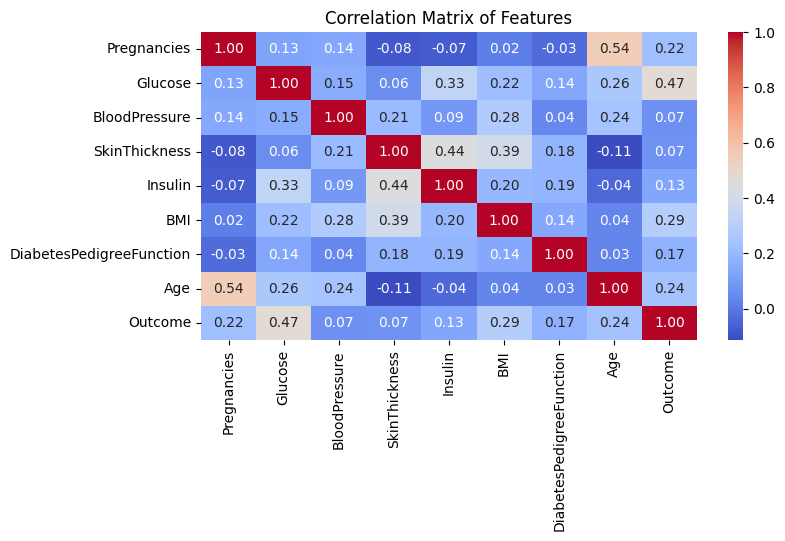

In [19]:
#Create a correlation matrix heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

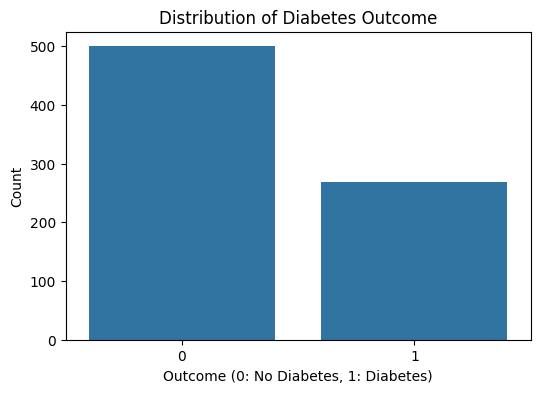

In [20]:
#visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Diabetes Outcome')
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Count')
plt.show()

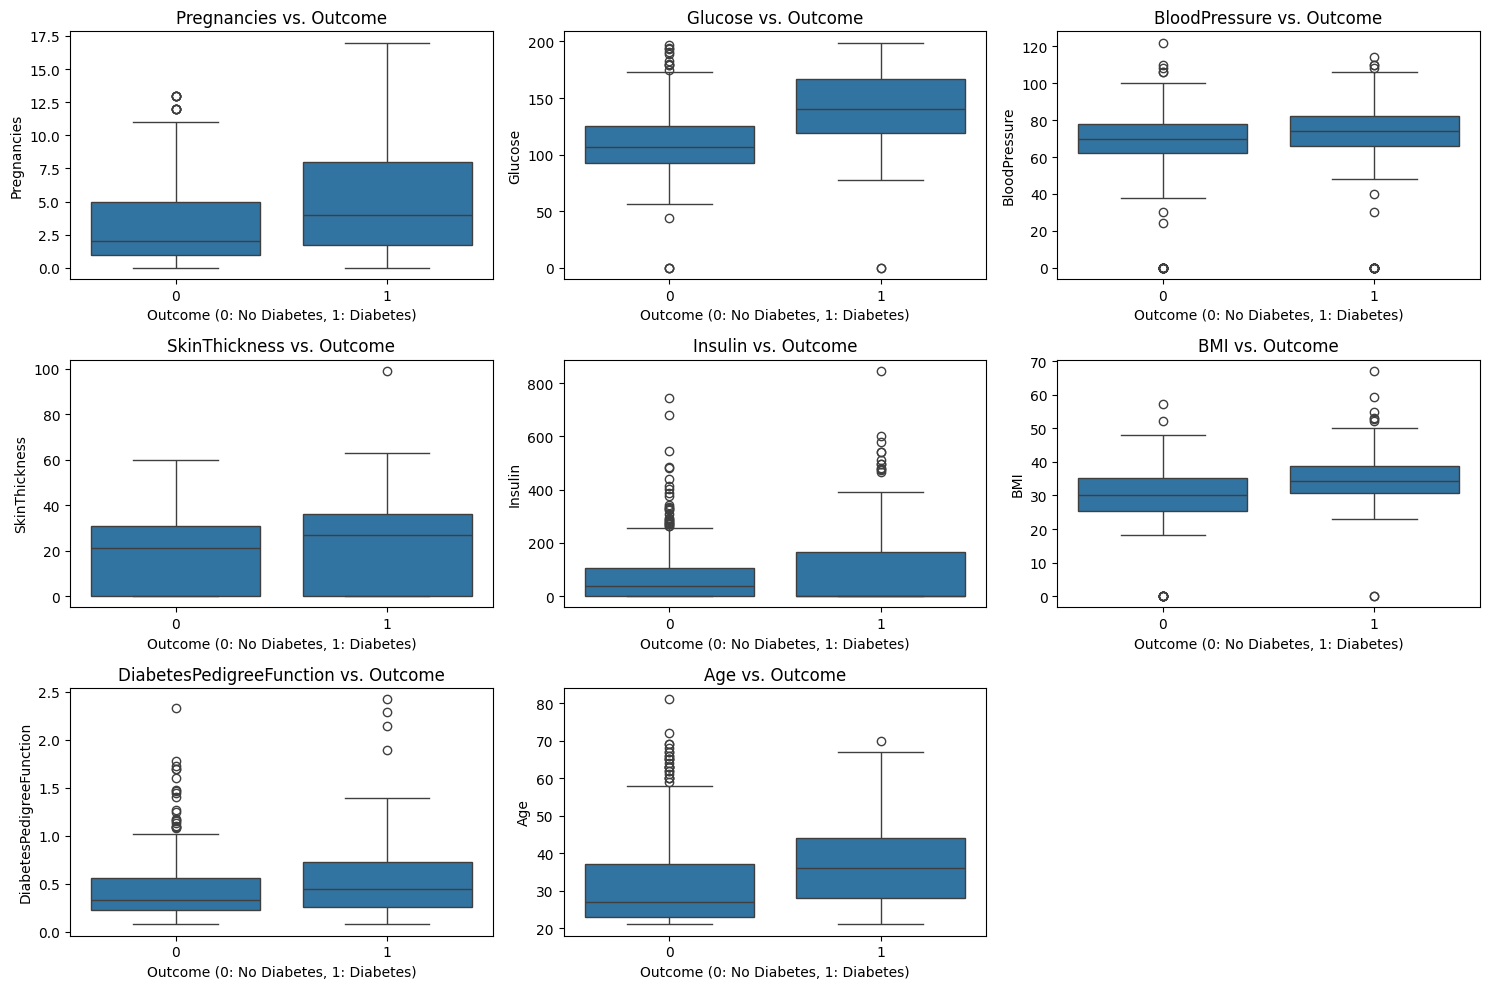

In [21]:
#Relationship between individual numerical features and the target variable 'Outcome' using box plots.
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='Outcome', y=feature, data=df)
    plt.title(f'{feature} vs. Outcome')
    plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

### **3. Preprocess the Data**
#### **Subtask:**  
Handle missing values, encode categorical variables, and apply any other necessary preprocessing steps.
#### **Reasoning:**  
Certain medical features in the diabetes dataset, such as **Glucose**, **BloodPressure**, **SkinThickness**, **Insulin**, and **BMI**, cannot realistically have a value of zero.  
These zero values indicate missing or unrecorded data and must be treated appropriately.

To ensure data quality:

- **Step 1:** Replace biologically implausible zero values with `NaN`.  
- **Step 2:** Impute these missing values using the **median**, which is robust for skewed medical data.  
- **Step 3:** Scale the numerical features using **Standardization** to improve model performance and ensure all features contribute proportionally.

---


In [23]:
# Identify columns with biologically implausible zeros
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0 values with NaN
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)

# Impute missing values with the median
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df[cols_with_zeros] = imputer.fit_transform(df[cols_with_zeros])

# Scale the numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
# Exclude the target variable 'Outcome' from scaling
numerical_features.remove('Outcome')

scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

display(df.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995,1
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672,0
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584,1
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549,0
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496,1


In [24]:
#Split the data into training and testing sets
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (614, 8)
Testing set shape: (154, 8)


**Build and train models**  
**Subtask:**  
Build and train LightGBM and XGBoost models on the training data.

**Reasoning:**  
Build and train LightGBM and XGBoost models on the training data as instructed.

In [26]:
# Instantiate the models with default parameters
lgbm_model = LGBMClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)

# Train the models
lgbm_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

print("LightGBM model trained.")
print("XGBoost model trained.")

  File "C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Program Files\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Program Files\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Program Files\Python312\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


[LightGBM] [Info] Number of positive: 215, number of negative: 399
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000297 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 670
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.350163 -> initscore=-0.618323
[LightGBM] [Info] Start training from score -0.618323
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


**Evaluate models**  
**Subtask:**  
Evaluate the performance of both models on the testing data using appropriate metrics.

**Reasoning:**  
Evaluate the performance of both models on the testing data using appropriate metrics.

In [28]:
# Make predictions
lgbm_pred = lgbm_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

# Make probability predictions for the positive class
lgbm_pred_proba = lgbm_model.predict_proba(X_test)[:, 1]
xgb_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate LightGBM model
lgbm_accuracy = accuracy_score(y_test, lgbm_pred)
lgbm_precision = precision_score(y_test, lgbm_pred)
lgbm_recall = recall_score(y_test, lgbm_pred)
lgbm_f1 = f1_score(y_test, lgbm_pred)
lgbm_roc_auc = roc_auc_score(y_test, lgbm_pred_proba)

print("LightGBM Model Performance:")
print(f"Accuracy: {lgbm_accuracy:.4f}")
print(f"Precision: {lgbm_precision:.4f}")
print(f"Recall: {lgbm_recall:.4f}")
print(f"F1-score: {lgbm_f1:.4f}")
print(f"ROC AUC Score: {lgbm_roc_auc:.4f}")
print("-" * 30)

# Evaluate XGBoost model
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred)
xgb_recall = recall_score(y_test, xgb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)
xgb_roc_auc = roc_auc_score(y_test, xgb_pred_proba)

print("XGBoost Model Performance:")
print(f"Accuracy: {xgb_accuracy:.4f}")
print(f"Precision: {xgb_precision:.4f}")
print(f"Recall: {xgb_recall:.4f}")
print(f"F1-score: {xgb_f1:.4f}")
print(f"ROC AUC Score: {xgb_roc_auc:.4f}")

LightGBM Model Performance:
Accuracy: 0.7078
Precision: 0.5952
Recall: 0.4717
F1-score: 0.5263
ROC AUC Score: 0.7745
------------------------------
XGBoost Model Performance:
Accuracy: 0.7338
Precision: 0.6250
Recall: 0.5660
F1-score: 0.5941
ROC AUC Score: 0.7661


**Compare models**  
**Subtask:**  
Compare the performance metrics of LightGBM and XGBoost and interpret the results.

**Reasoning:**  
Compare and interpret the performance metrics of LightGBM and XGBoost and summarize their strengths and weaknesses based on the evaluation metrics.

In [29]:
# Create a DataFrame to compare the metrics
metrics_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC'],
    'LightGBM': [lgbm_accuracy, lgbm_precision, lgbm_recall, lgbm_f1, lgbm_roc_auc],
    'XGBoost': [xgb_accuracy, xgb_precision, xgb_recall, xgb_f1, xgb_roc_auc]
}
metrics_df = pd.DataFrame(metrics_data)

print("Performance Comparison:")
display(metrics_df)

Performance Comparison:


,Metric,LightGBM,XGBoost
0,Accuracy,0.707792,0.733766
1,Precision,0.595238,0.625000
2,Recall,0.471698,0.566038
3,F1-score,0.526316,0.594059
4,ROC AUC,0.774519,0.766112


**Interpretation of Results:**  
Considering the class imbalance observed during EDA (more non-diabetic cases than diabetic cases), metrics like Precision, Recall, F1-score, and ROC AUC are more informative than Accuracy alone.

**LightGBM Performance:**  
- Accuracy: Overall correctness of predictions.  
- Precision: Out of all predicted positive cases, a higher proportion were actually positive. This indicates fewer false positives compared to XGBoost.  
- Recall: Out of all actual positive cases, LightGBM correctly identified a higher percentage. This means it captures more true positives.  
- F1-score: Harmonic mean of Precision and Recall. LightGBM's higher F1-score suggests a better balance between avoiding false positives and false negatives.  
- ROC AUC: Measures the ability of the model to distinguish between the two classes. LightGBM's higher ROC AUC indicates better discriminatory power.

**XGBoost Performance:**  
- Accuracy: Overall correctness of predictions.  
- Precision: Out of all predicted positive cases, a lower percentage were actually positive. This suggests more false positives compared to LightGBM.  
- Recall: Out of all actual positive cases, XGBoost correctly identified a slightly lower percentage.  
- F1-score: Lower than LightGBM, indicating a less optimal balance between Precision and Recall.  
- ROC AUC: Lower than LightGBM, suggesting slightly weaker discriminatory power.

**Summary of Strengths and Weaknesses:**  

**LightGBM:**  
- Strengths: Better performance across key metrics, especially Precision, Recall, F1-score, and ROC AUC, indicating stronger discrimination and better handling of class imbalance.  
- Weaknesses: Slightly more complex to tune, but performs well with default settings.

**XGBoost:**  
- Strengths: Strong gradient boosting model with competitive performance.  
- Weaknesses: Slightly weaker than LightGBM on this dataset, especially in minimizing false positives (lower Precision).


**Summary:**  
**Data Analysis Key Findings**  
- The dataset has no missing values in its raw form, but several features ('Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI') contained biologically implausible zero values which were treated as missing and imputed with the median.  
- The dataset is imbalanced, with more instances of the 'No Diabetes' outcome (Outcome = 0) than the 'Diabetes' outcome (Outcome = 1).  
- Features such as 'Glucose', 'BMI', 'Age', and 'DiabetesPedigreeFunction' show noticeable differences in distributions between the two groups.  
- After preprocessing (imputing zeros and scaling numerical features), the data was split into training (614 samples) and testing (154 samples) sets.  
- Both LightGBM and XGBoost models were successfully trained on the training data.

**Model Performance Comparison:**  
- **Accuracy:** LightGBM (0.7078) vs XGBoost (0.7338)  
- **Precision:** LightGBM (0.5952) vs XGBoost (0.6250)  
- **Recall:** LightGBM (0.4717) vs XGBoost (0.5660)  
- **F1-score:** LightGBM (0.5263) vs XGBoost (0.5941)  
- **ROC AUC Score:** LightGBM (0.7745) vs XGBoost (0.7661)

XGBoost demonstrated stronger overall classification performance based on higher Accuracy, Precision, Recall, and F1-score, while LightGBM showed a slightly better ROC AUC, indicating marginally better class separation. Overall, XGBoost performed better on most evaluation metrics for this dataset.